In [1]:
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn

import konlpy
from konlpy.tag import Twitter, Okt

import gensim
from gensim.models import Phrases
from gensim.models.word2vec import LineSentence
from gensim import corpora, models
from gensim.models import LdaMulticore
from gensim.models import Word2Vec
from gensim.corpora import Dictionary, MmCorpus

import pyLDAvis
import pyLDAvis.gensim
import pickle

from wordcloud import WordCloud
from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE

from os import path
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource

Duplicate key in file WindowsPath('c:/Users/god12/Anaconda3/envs/wassup/Lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 263 ('font.family:  sans-serif')


In [2]:
df = pd.read_csv('songs(발라드, 병합).csv')
print(len(df))
df.head()

5020


,Title,Likes,Singer,Lyrics
0,Love wins all,"153,096",아이유,"Dearest, Darling, My universe\r\n날 데려가 줄래?\r\n..."
1,천상연,"35,962",이창섭,아니길 바랬었어\r\n꿈이길 기도했지\r\n너 없는 가슴으로 살아가야 하는 건\r\...
2,비의 랩소디,"64,664",임재현,이젠 눈물 그쳐 나를 봐요\r\n우는 그대 더 아름다워\r\n내게 이 모습조차 더 ...
3,그대만 있다면 (여름날 우리 X 너드커넥션 (Nerd Connection)),"93,586",너드커넥션 (Nerd Connection),날 사랑해서 떠난다며\r\n눈물짓던 그대의 말을 믿을 수 없죠\r\n하지만 나의 전...
4,헤어지자 말해요,"168,165",박재정,헤어지자고 말하려 오늘\r\n너에게 가다가 우리 추억 생각해 봤어\r\n처음 본 네...


In [3]:
lyrics = df.Lyrics.to_list()
print(len(lyrics))
print(lyrics[0])
file_name = 'song_ballad_text.txt'
with open(file_name, 'w') as file:
    file.write('\n'.join(lyrics))

5020
Dearest, Darling, My universe
날 데려가 줄래?
나의 이 가난한 상상력으론
떠올릴 수 없는 곳으로

저기 멀리 from Earth to Mars
꼭 같이 가줄래?
그곳이 어디든, 오랜 외로움
그 반대말을 찾아서

어떤 실수로
이토록 우리는
함께일까

세상에게서 도망쳐 Run on
나와 저 끝까지 가줘 My lover
나쁜 결말일까 길 잃은 우리 둘 um

부서지도록 나를 꼭 안아
더 사랑히 내게 입 맞춰 Lover
Love is all Love is all
Love Love Love Love

결국, 그럼에도,
어째서 우리는
서로일까

세상에게서 도망쳐 Run on
나와 저 끝까지 가줘 My lover
나쁜 결말일까 길 잃은 우리 둘 um

찬찬히 너를 두 눈에 담아
한 번 더 편안히 웃어주렴

유영하듯 떠오른
그날 그 밤처럼,
나와 함께 겁 없이
저물어줄래?

산산히 나를 더 망쳐 Ruiner
너와 슬퍼지고 싶어 My lover

필연에게서 도망쳐 Run on
나와 저 끝까지 가줘 My lover
일부러 나란히 길 잃은 우리 두 사람

부서지도록 나를 꼭 안아
더 사랑히 내게 입 맞춰 Lover
Our Love wins all Love wins all
Love Love Love Love


In [4]:
with open('song_ballad_text.txt', 'r') as f:
    lyrics = f.read()
print(lyrics[:50])

Dearest, Darling, My universe

날 데려가 줄래?

나의 이 가난한


In [5]:
okt = Okt()

stop_words = ['\n', '?', '.', ',', '!', '\r']
def normalize(lyric):
    nouns = okt.nouns(lyric)
    lyric_noun = [noun for noun in nouns if len(noun) > 1 and noun not in stop_words]
    return lyric_noun

In [7]:
normalized_text = normalize(lyrics)

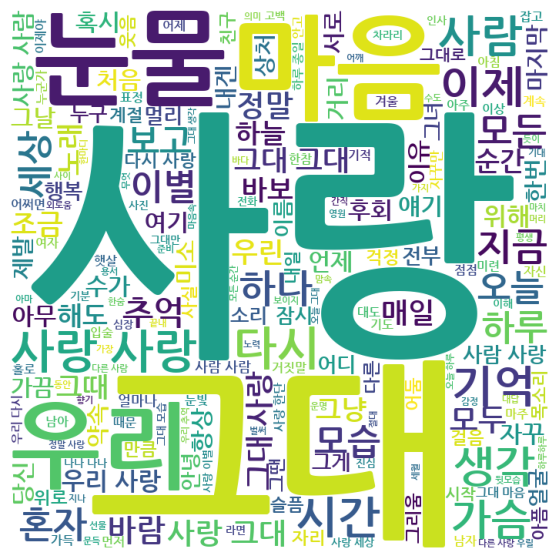

In [8]:
text = ' '.join(normalized_text)
wc = WordCloud(font_path = 'NanumGothicBold.ttf', width = 700, height = 700, background_color = 'white').generate(text)
wc.to_file('ballad_test_all.png')
plt.figure(figsize = (7, 7))
plt.axis('off')
plt.imshow(wc)
plt.show()